In [4]:
import pandas as pd
import numpy as np

In [5]:
Train_v=pd.read_csv("Train_V.csv")
Train_v.head(10)

,Unnamed: 0,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,v_15,Class,Pass_No,iter_No
0,0,2.441323,2.444771,2.445271,2.444908,2.442032,2.429262,2.418031,2.410192,2.438874,2.424976,2.434209,2.409226,2.441090,2.438640,2.440920,2.397809,3_Bumps,0,1
1,1,2.441267,2.444747,2.445223,2.444780,2.441968,2.428844,2.417451,2.409701,2.438906,2.425041,2.434209,2.409274,2.441106,2.438705,2.440953,2.398776,3_Bumps,0,1
2,2,2.441235,2.444651,2.445190,2.444618,2.441919,2.428489,2.417032,2.409266,2.438922,2.425105,2.434193,2.409314,2.441065,2.438769,2.440985,2.399743,3_Bumps,0,1
3,3,2.441202,2.444530,2.445126,2.444465,2.441887,2.428159,2.416887,2.409073,2.438938,2.425186,2.434225,2.409371,2.441033,2.438834,2.441017,2.400677,3_Bumps,0,1
4,4,2.441154,2.444377,2.444715,2.444167,2.441879,2.427804,2.416759,2.408815,2.438955,2.425250,2.434225,2.409451,2.441049,2.438898,2.441049,2.401580,3_Bumps,0,1
5,5,2.441146,2.444320,2.444264,2.443917,2.441847,2.427474,2.416630,2.408525,2.438971,2.425315,2.434225,2.409516,2.441033,2.438963,2.441082,2.402426,3_Bumps,0,1
6,6,2.441098,2.444199,2.443781,2.443595,2.441815,2.427144,2.416517,2.408267,2.438947,2.425379,2.434225,2.409580,2.441049,2.439027,2.441114,2.403360,3_Bumps,0,1
7,7,2.441065,2.444054,2.443273,2.443329,2.441782,2.426813,2.416404,2.408009,2.438963,2.425444,2.434225,2.409645,2.441025,2.439092,2.441146,2.404295,3_Bumps,0,1
8,8,2.441009,2.443926,2.442661,2.443007,2.441686,2.426467,2.416283,2.407751,2.438979,2.425508,2.434258,2.409709,2.441009,2.439156,2.441178,2.405165,3_Bumps,0,1
9,9,2.440912,2.443764,2.442040,2.442725,2.441646,2.426112,2.416154,2.407534,2.438995,2.425573,2.434258,2.409773,2.440969,2.439220,2.441210,2.406116,3_Bumps,0,1


In [6]:
import matplotlib.pyplot as plt
import spiking_neurons as spkn
import time


In [7]:
numTextures = 8
numIte = 2
numPass=8
numTaxels = 16
dt = 1

In [8]:
textures=['3_Bumps','6_Bumps','4_Ridges','6_Ridges','4_Waves','6_Waves','4_Blob','6_Blob']
iterations=[1,2]
Pass=[0,1,2,3,4,5,6,7]
newfile = 'IzzTrain_V.txt'
newf = open(newfile,'w')
for i in textures:
    for j in iterations:
        for k in Pass:
            tactiledata=Train_v.loc[(Train_v.Class==i)&(Train_v.iter_No==j)&(Train_v.Pass_No==k),:]
            tactiledata=tactiledata.drop(columns=['Unnamed: 0'],axis=1)
            tactiledata=tactiledata.drop(columns=['Class','iter_No','Pass_No'],axis=1)
            tactiledata=tactiledata.to_numpy()
            tactiledata= np.abs(tactiledata*50 - 2.44*50 - 2.5)+1
            Im = [tactiledata[:,k] for k in range(numTaxels)]
            nrn = [spkn.model.izhikevich(d=8) for k in range(numTaxels)]
           
            simulObj = spkn.simulation(dt=1,t0=0,tf=len(tactiledata),I=Im,neurons=nrn)
            simulObj.run()
            spikeMatrix = [np.zeros(len(tactiledata)) for k in range(numTaxels)]
            for k in range(numTaxels):
                spikeMatrix[k][simulObj.spikes[k]] = 1
                # plt.figure(); plt.plot(spikeMatrix[k]); plt.show()

            for z in range(len(tactiledata)):
                for k in range(numTaxels):
                    newf.write(str(spikeMatrix[k][z]) + ' ')
                newf.write('\n')
newf.close()

df = pd.read_csv('IzzTrain_V.txt', sep=" ",header=None)
df['Class']=Train_v['Class']
df['Pass_No']=Train_v['Pass_No']
df['iter_No']=Train_v['iter_No']
df.to_csv('IzzTrain_V.csv')
            
            

            




827


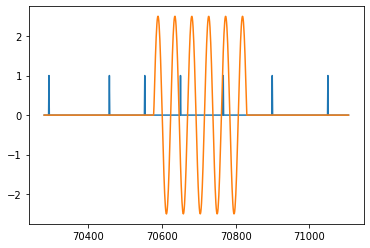

In [9]:
clas='6_Waves'
iter_no=1
pass_no=6
sens_no=7
izz=pd.read_csv('IzzTrain_V.csv')
tactiledata=izz.loc[(izz.Class==clas)&(izz.iter_No==iter_no)&(izz.Pass_No==pass_no),:]
tactiledata=tactiledata[str(sens_no)]

zz=pd.read_csv('Train_Z.csv')
z=zz.loc[(zz.Class==clas)&(zz.iter_No==iter_no)&(zz.Pass_No==pass_no),:]
z=z['z_'+str(sens_no)]
print(len(z))
# print(len(tactiledata))
plt.plot(tactiledata)
plt.plot(z)